In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('Data/fraudTrain.csv')
test_df = pd.read_csv('Data/fraudTest.csv')
print(train_df.shape) # 23 columns, 1296675 entries
print(test_df.shape) # 23 columns, 555719 entries

(1296675, 23)
(555719, 23)


In [3]:
print(train_df['is_fraud'].value_counts()) # 0 - 1289169, 1 - 7506
print(test_df['is_fraud'].value_counts()) # 0 - 553574, 1 - 2145
print(test_df.isna().sum()) # no null values
print(train_df.isna().sum()) # no null values

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
is_fraud
0    553574
1      2145
Name: count, dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
str

In [4]:
print(train_df.columns)
train_df.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'lat', 'long', 'dob', 'trans_num', 'merch_lat', 'merch_long'], axis=1, inplace=True)
test_df.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'lat', 'long', 'dob', 'trans_num', 'merch_lat', 'merch_long'], axis=1, inplace=True)
train_y = train_df['is_fraud']
test_y = test_df['is_fraud']
train_X = train_df.drop('is_fraud', axis=1)
test_X = test_df.drop('is_fraud', axis=1)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [5]:
# here we have a lot of features in string format, but for our model numerical value will be good
# so we will convert these features using target encoding
import category_encoders as ec

target_encoder = ec.TargetEncoder(cols=['merchant', 'category', 'gender', 'city', 'state', 'job', 'zip'])
X_train_enc = target_encoder.fit_transform(train_X, train_y)
X_test_enc = target_encoder.transform(test_X)

In [9]:
# since the number of Actual fraud transactions are very less in our datasets, this could lead our model to overfit the non fraud detections
# For this we should increase the number of fraud transactions
# this can be done by SMOTE (Synthetic Minority Oversampling Technique)
# for this we use a specific library named 'imbalanced-learn'
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=43)
train_X_resampled, train_y_resampled = smote.fit_resample(X_train_enc, train_y) # 0 - 1289169, 1 - 1289169
test_X_resampled, test_y_resampled = smote.fit_resample(X_test_enc, test_y) # 0 - 553574, 1 - 553574

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:


random_forest = RandomForestClassifier()
random_forest.fit(train_X_resampled, train_y_resampled)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(train_X_resampled,train_y_resampled)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [14]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred_tree = tree.predict(test_X_resampled)

print(f"Accuracy Score: {accuracy_score(y_pred=y_pred_tree, y_true=test_y_resampled)}")
print(f"Classification Report \n {classification_report(y_pred=y_pred_tree, y_true=test_y_resampled)}")
confus_tree = confusion_matrix(y_pred=y_pred_tree, y_true=test_y_resampled)

Accuracy Score: 0.5142058694953159
Classification Report 
               precision    recall  f1-score   support

           0       0.51      0.99      0.67    553574
           1       0.76      0.04      0.08    553574

    accuracy                           0.51   1107148
   macro avg       0.63      0.51      0.37   1107148
weighted avg       0.63      0.51      0.37   1107148



In [15]:
y_pred_RF = random_forest.predict(test_X_resampled)

print(f"Accuracy Score: {accuracy_score(y_pred=y_pred_RF, y_true=test_y_resampled)}")
print(f"Classification Report \n {classification_report(y_pred=y_pred_RF, y_true=test_y_resampled)}")
confus_RF = confusion_matrix(y_pred=y_pred_RF, y_true=test_y_resampled)

Accuracy Score: 0.5503546048044164
Classification Report 
               precision    recall  f1-score   support

           0       0.53      1.00      0.69    553574
           1       0.99      0.10      0.18    553574

    accuracy                           0.55   1107148
   macro avg       0.76      0.55      0.44   1107148
weighted avg       0.76      0.55      0.44   1107148



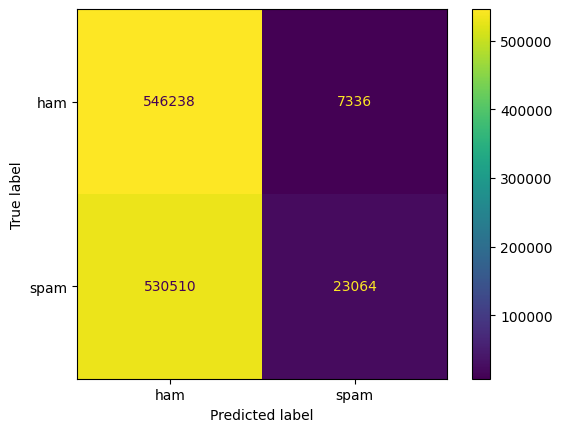

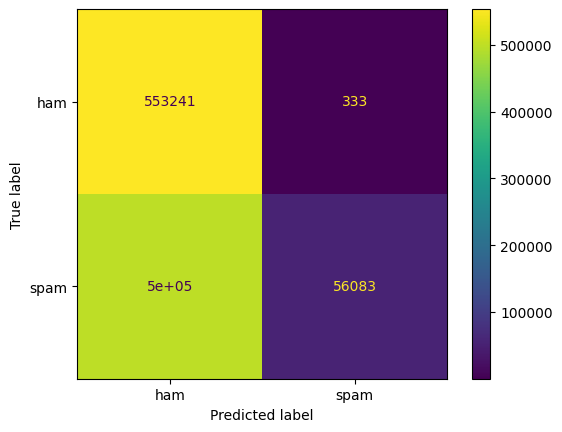

In [16]:
import matplotlib.pyplot as plt

conf_mat_tree = confusion_matrix(y_pred=y_pred_tree, y_true=test_y_resampled)
conf_mat_fore = confusion_matrix(y_pred=y_pred_RF, y_true=test_y_resampled)

conf_mat_disp_count = ConfusionMatrixDisplay(confusion_matrix=conf_mat_tree, display_labels=['ham', 'spam'])
conf_mat_disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=conf_mat_fore, display_labels=['ham', 'spam'])
conf_mat_disp_count.plot()
conf_mat_disp_tfidf.plot()
plt.show()